Welcome to today's lab!  

The main priority today will be to introduce ourselves to the SciKit learn API and fit a decision tree on a dataset and understand its main points.  

Today's lab will lay a foundation for working with more sophisticated models that represent the edge of machine learning.

**Step 1:**  Load in the file `housing.csv`

In [5]:
# your code here
import pandas as pd

df = pd.read_csv(r"C:\Users\elena\data-course\Homework\Unit2\data\housing.csv")

**Step 2:** Declare `X` & `y`

`y` is the `PRICE` column, and `X` is every numeric column except `PRICE`.

In [6]:
# your code here
X = df.drop('PRICE', axis=1)
y = df['PRICE']

**Step 3:** Initialize a `DecisionTreeRegressor` with a `max_depth` of 3, and fit it on `X` and `y`

In [7]:
# your code here
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=3)

tree.fit(X, y)

DecisionTreeRegressor(max_depth=3)

**Step 4:** Call `plot_tree` to visualize the results

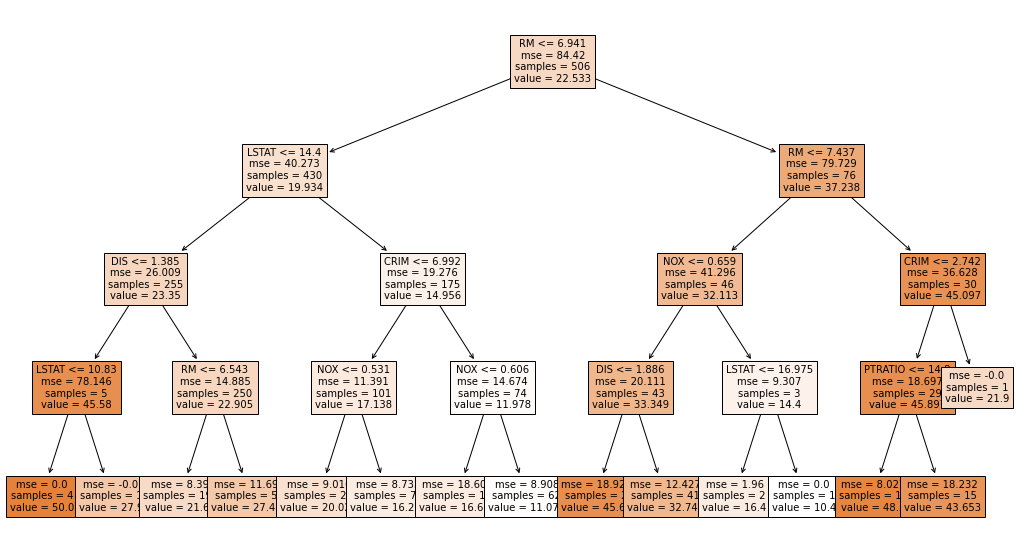

In [13]:
# your code here
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(18, 10))

plot_tree(tree, fontsize=10, filled=True, feature_names=X.columns);
plt.savefig('tree.png')

**Step 5:** Call the `predict` method on your original dataset.  Look at the results, and make sure you can make sense out of them/

In [9]:
# your code here
df['Prediction'] = tree.predict(X)

In [10]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,Prediction
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,22.905200
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,22.905200
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,33.348837
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,33.348837
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,33.348837


**Step 6:** call the `score` method on your model, and pass in `X` and `y` as arguments.  We'll talk about the results of this after the lab

In [11]:
# your code here
tree.score(X, y)

0.8177924678036443

**Step 7:** Try changing the following parameters to see what they do.  It might help to draw the tree after you are done fitting to see what has changed.  If you want some guidance you can look at the source page for the scikit-learn decision tree:  https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

 - `max_depth`: positive integer.  Set it to `None` if you want the tree to split indefinitely
 - `max_features`: can be a fraction (between 0 and 1) or an integer
 - `min_samples_leaf`: integer or fraction (between 0 and 1)

In [12]:
# your code here
tree.set_params(max_depth=4)
tree.fit(X, y)
tree.score(X, y)

0.8857396443908376

In [ ]:
# your code here
tree.set_params(max_depth=5)
tree.fit(X, y)
tree.score(X, y)

In [14]:
# your code here
tree.set_params(max_depth=6)
tree.fit(X, y)
tree.score(X, y)


0.9449577232928197

In [16]:
y.mean()

22.532806324110698

In [18]:
y.shape

(506,)

In [43]:
import numpy as np
root_mse=np.mean((y-y.mean())**2)

In [57]:
df['RM'].unique()

array([6.575, 6.421, 7.185, 6.998, 7.147, 6.43 , 6.012, 6.172, 5.631,
       6.004, 6.377, 6.009, 5.889, 5.949, 6.096, 5.834, 5.935, 5.99 ,
       5.456, 5.727, 5.57 , 5.965, 6.142, 5.813, 5.924, 5.599, 6.047,
       6.495, 6.674, 5.713, 6.072, 5.95 , 5.701, 5.933, 5.841, 5.85 ,
       5.966, 6.595, 7.024, 6.77 , 6.169, 6.211, 6.069, 5.682, 5.786,
       6.03 , 5.399, 5.602, 5.963, 6.115, 6.511, 5.998, 5.888, 7.249,
       6.383, 6.816, 6.145, 5.927, 5.741, 6.456, 6.762, 7.104, 6.29 ,
       5.787, 5.878, 5.594, 5.885, 6.417, 5.961, 6.065, 6.245, 6.273,
       6.286, 6.279, 6.14 , 6.232, 5.874, 6.727, 6.619, 6.302, 6.167,
       6.389, 6.63 , 6.015, 6.121, 7.007, 7.079, 6.405, 6.442, 6.249,
       6.625, 6.163, 8.069, 7.82 , 7.416, 6.781, 6.137, 5.851, 5.836,
       6.127, 6.474, 6.229, 6.195, 6.715, 5.913, 6.092, 6.254, 5.928,
       6.176, 6.021, 5.872, 5.731, 5.87 , 5.856, 5.879, 5.986, 5.613,
       5.693, 6.431, 5.637, 6.458, 6.326, 6.372, 5.822, 5.757, 6.335,
       5.942, 6.454,

In [67]:
left_side=df[df['RM']<=6.941]
right_side=df[df['RM']>6.941]

In [68]:
left_mse=np.mean((y[left_side.index].mean()-y[left_side.index])**2)
right_mse=np.mean((y[right_side.index].mean()-y[right_side.index])**2)

In [69]:
left_mse


40.272839643050304

In [70]:
right_mse

79.7292018698061

In [71]:
left_weight=left_side.shape[0]/y.shape[0]

In [72]:
right_weight=right_side.shape[0]/y.shape[0]

In [73]:
left_weight+right_weight

1.0

In [74]:
(left_weight*left_mse)+(right_weight*right_mse)

46.199091677108484

In [75]:
#the bigger the difference the better

root_mse - ((left_weight*left_mse)+(right_weight*right_mse))

38.220464479057114

In [76]:
#other error functions - absolute errors (built in function)

In [77]:
left_side.shape

(430, 15)

In [78]:
right_side.shape

(76, 15)